In [1]:
import pymks
import numpy as np
from PIL import Image
from Scripts import SpatialCorrelations as corr
import matplotlib.pyplot as plt
import pandas as pd

### Changing the image from png/dat file to numpy array

In [2]:
image_path ='/Users/adithyaiyer/Desktop/data_hex/c-time_000010000.dat'
img_ = corr.dat_to_numpy(image_path)

## Visualizing the microstructure(cropped if png)

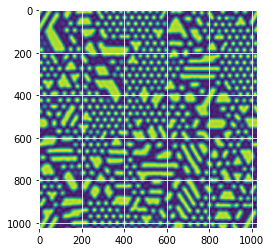

In [3]:
plt.imshow(img_)

## Binarize array

In [4]:
img_binary = corr.binarize_image_dat(img_)

In [5]:
img_binary = img_binary.astype(np.double)

In [6]:
type(img_binary[0][0])

numpy.float64

In [7]:
img_binary

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [8]:
img_binary.shape

(1024, 1024)

# Correlation plots obtained by using PYMKS library

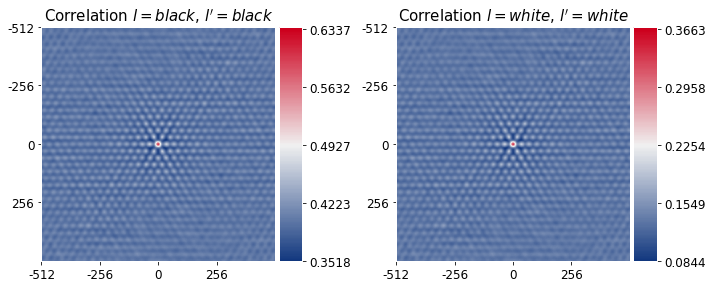

In [9]:
# Auto Correlation

auto_pymks =corr.auto_corr_from_pymks(img_binary)


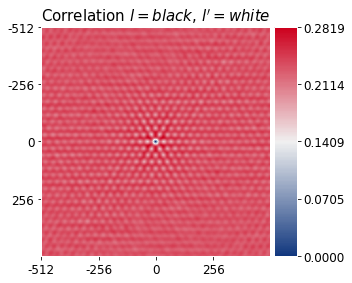

In [10]:
# Cross Correlation

cross_pymks =corr.cross_corr_from_pymks(img_binary)

# Plots obtained by self built CODE

white region : 


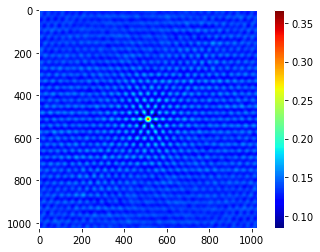

black region : 


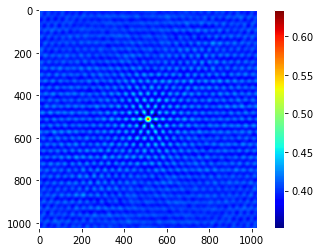

In [11]:
# AutoCorrelations

white_stats, black_stats = corr.auto_corr_from_code(img_binary)

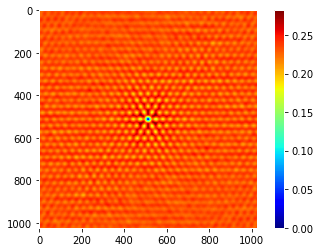

In [12]:
# Cross Correlations

cross = corr.cross_corr_from_code(img_binary)

In [13]:
np.min(cross.flatten())

0.0

In [15]:
cross_flat = (cross[512])
cross_pymks_flat = (cross_pymks[0][512].flatten())

## Plotting 2 point stats accross all vectors

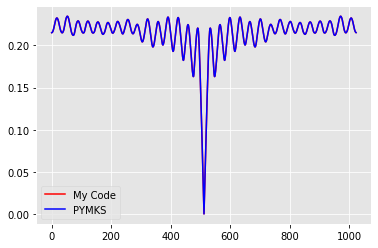

In [16]:
plt.plot(cross_pymks_flat,'r',cross_flat,'b')
plt.legend(['My Code','PYMKS'])


## Showing close up view to verify that there is no deviation

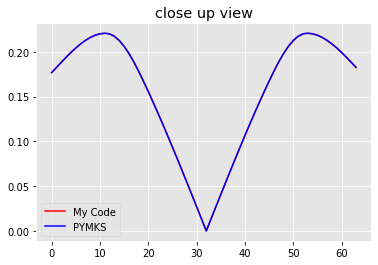

In [18]:
cross_flat = (cross[512])[480:544]
cross_pymks_flat = (cross_pymks[0][512].flatten())[480:544]
plt.plot(cross_pymks_flat,'r',cross_flat,'b')
plt.title("close up view")
plt.legend(['My Code','PYMKS'])


# Radial Destribution Probability

From outputs of my code


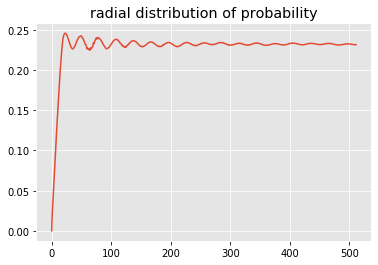

In [19]:
## From my code

r_val =corr.radialDistribution(cross)
reshaped_from_pymks = np.reshape(cross_pymks.flatten(),cross.shape)
print('From outputs of my code')

From outputs of PyMKS


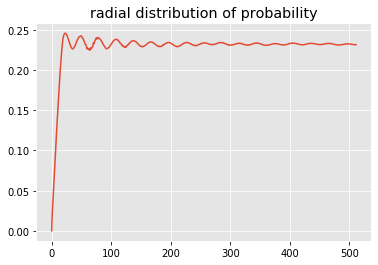

In [20]:
## From PYMKS

r_val_pymks = corr.radialDistribution(reshaped_from_pymks)
print('From outputs of PyMKS')

# Getting radially distributed prob between 2 angles

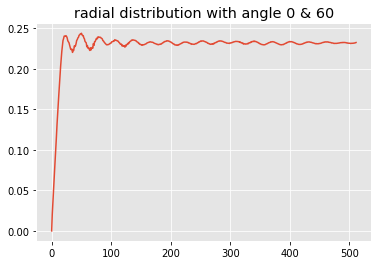

In [23]:
AngleChosenForOutput, radialProbDistribution =corr.giveAvailablePoints(cross,0,60,0)

Text(0.5, 1.0, 'Angles Chosen')

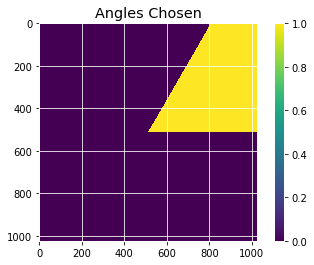

In [24]:
plt.imshow(AngleChosenForOutput)
plt.colorbar()
plt.title('Angles Chosen')

## Show radial distribution between 2 mirror regions

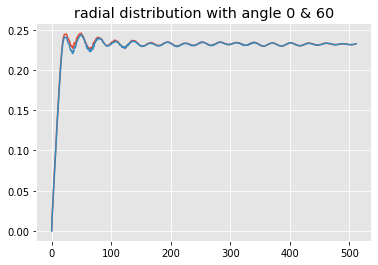

In [36]:
AngleChosenForOutput1, radialProbDistribution1 =corr.giveAvailablePoints(cross,180,240,0)
AngleChosenForOutput2, radialProbDistribution2 =corr.giveAvailablePoints(cross,0,60,0)


## Show radial distribution between 2 non-mirror regions

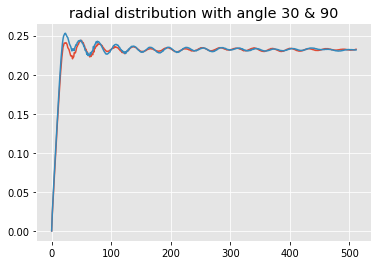

In [35]:
AngleChosenForOutput1, radialProbDistribution1 =corr.giveAvailablePoints(cross,0,60,0)
AngleChosenForOutput2, radialProbDistribution2 =corr.giveAvailablePoints(cross,30,90,0)
